# Predicción de Consumo Energético
-----------------------------------
**Autores:**  
- Costela Guijosa, Jose Luis  
- Sanchez Jimenez, Manuel  

**Fecha:**  
Enero de 2025

**Descripción:**  
Predicción de consumo energético.

**Contacto:**  
- joscosgui@alum.us.es  
- mansanjim1@alum.us.es
------------------------------------

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_season

df = pd.read_csv('Data/Energy_consumption_dataset.csv')

Se realiza un análisis preliminar del dataframe para identificar los tipos de variables presentes en sus atributos

In [73]:
print("Información del dataframe:")
print(df.info(), "\n")

print("Primeras instancias del dataframe:")
print(df.head(), "\n")

print("Descripcion del dataframe:")
print(df.describe())

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None 

Primeras instancias del dataframe:
   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     

Se realiza una pequeña consulta por si existe algún dato faltante

In [74]:
print("Se revisa si existe algún dato faltante")
print(df.isnull().sum()) # Se comprueba que no existe ningún dato faltante
print("Observando las metricas anteriores se observa que no hay datos faltantes")

Se revisa si existe algún dato faltante
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64
Observando las metricas anteriores se observa que no hay datos faltantes


## Histograma de energia consumida.
A través de este histograma se observa como los datos de consumo eléctrico siguen una distribución similar
a una distribución normal centrada en un rango de 75 a 80 unidades.

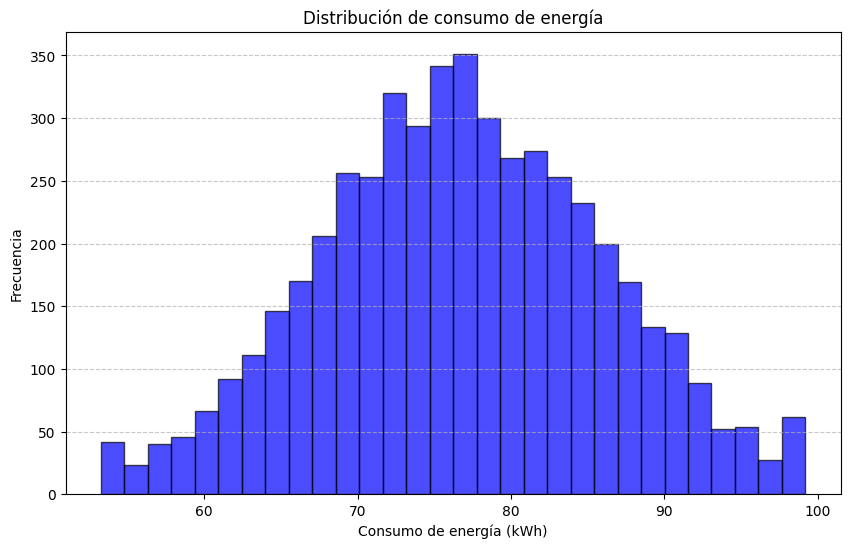

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(df['EnergyConsumption'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución de consumo de energía')
plt.xlabel('Consumo de energía (kWh)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Consumo horario en vacaciones y no-vacaciones 

En días festivos, el consumo energético presenta un comportamiento más irregular, con picos durante la noche y una estructura diaria menos definida, lo que refleja horarios más flexibles. Por otro lado, en los días no festivos, se observan patrones más estructurados, con aumentos en horas laborales y de la tarde, mostrando rutinas más marcadas.

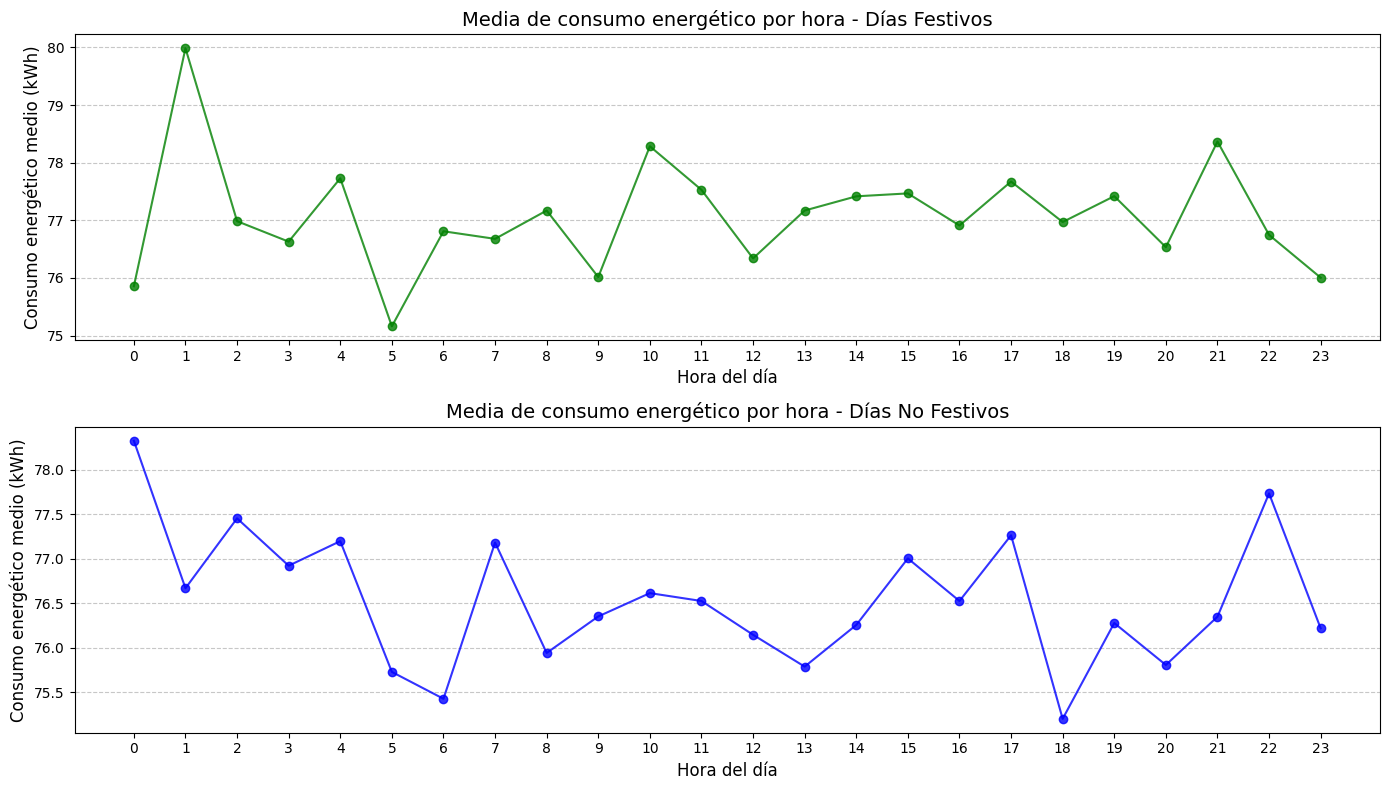

In [76]:
df_holiday = df[df['Holiday'] == 'Yes']
df_non_holiday = df[df['Holiday'] == 'No']

df_hourly_energy_holiday = df_holiday.groupby('Hour')['EnergyConsumption'].mean()
df_hourly_energy_non_holiday = df_non_holiday.groupby('Hour')['EnergyConsumption'].mean()

# Días festivos
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(df_hourly_energy_holiday.index, df_hourly_energy_holiday.values, marker='o', linestyle='-', color='green', alpha=0.8)
plt.title('Media de consumo energético por hora - Días Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio (kWh)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Días no festivos
plt.subplot(2, 1, 2)
plt.plot(df_hourly_energy_non_holiday.index, df_hourly_energy_non_holiday.values, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.title('Media de consumo energético por hora - Días No Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio (kWh)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

## Consumo en los distintos dias de la semana

Durante los dias de la semana el consumo energético es regular.

DayOfWeek
Friday       77.103561
Monday       76.171877
Saturday     77.325581
Sunday       76.578337
Thursday     76.454205
Tuesday      77.210683
Wednesday    76.684472
Name: EnergyConsumption, dtype: float64
DayOfWeek
Monday       76.171877
Tuesday      77.210683
Wednesday    76.684472
Thursday     76.454205
Friday       77.103561
Saturday     77.325581
Sunday       76.578337
Name: EnergyConsumption, dtype: float64


/tmp/ipykernel_22281/1449759358.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')


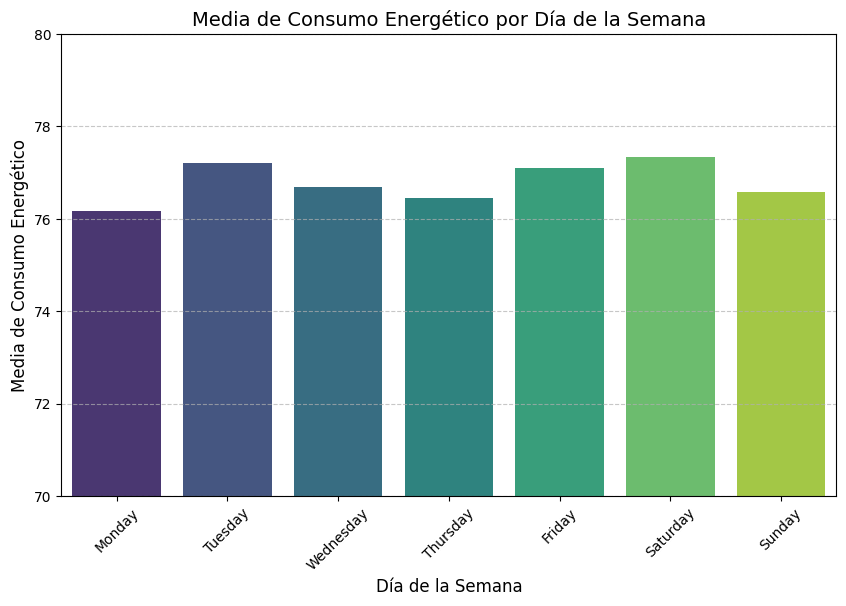

In [77]:
mean_consumption_by_day = df.groupby('DayOfWeek')['EnergyConsumption'].mean()
print(mean_consumption_by_day)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_consumption_by_day = mean_consumption_by_day.reindex(ordered_days)
print(mean_consumption_by_day)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')
plt.title('Media de Consumo Energético por Día de la Semana', fontsize=14)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


## Consumo en las distintas estaciones del año

In [78]:
def get_season(month):
    if month in [12, 1, 2]:  # Invierno
        return 'Invierno'
    elif month in [3, 4, 5]:  # Primavera
        return 'Primavera'
    elif month in [6, 7, 8]:  # Verano
        return 'Verano'
    elif month in [9, 10, 11]:  # Otoño
        return 'Otoño'

/tmp/ipykernel_22281/288455098.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')


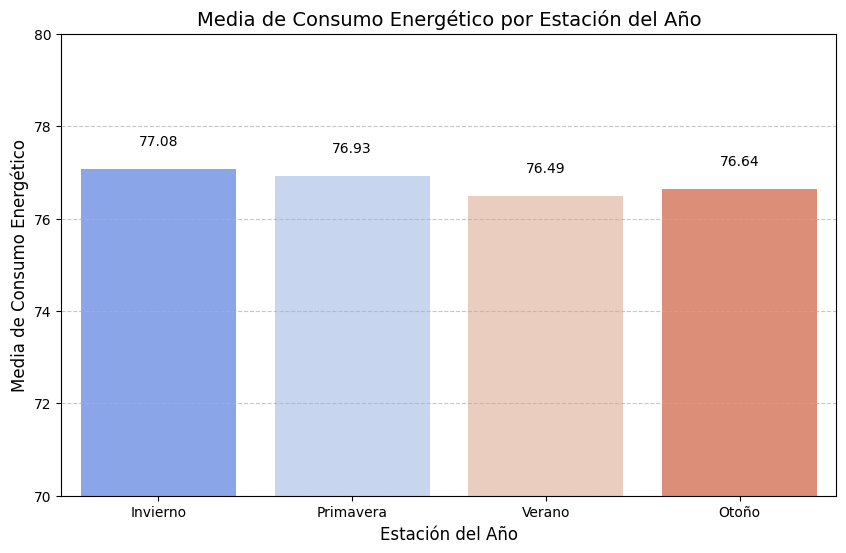

In [79]:
df['season'] = df['Month'].apply(get_season)

mean_consumption_by_season = df.groupby('season')['EnergyConsumption'].mean()

ordered_seasons = ['Invierno', 'Primavera', 'Verano', 'Otoño']
mean_consumption_by_season = mean_consumption_by_season.reindex(ordered_seasons)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')
plt.title('Media de Consumo Energético por Estación del Año', fontsize=14)
plt.xlabel('Estación del Año', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)

for index, value in enumerate(mean_consumption_by_season.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)